In [4]:
import pandas as pd
import sys
import os
dev = True  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries as ATS

Importing plotly failed. Interactive plots will not work.


Imported auto_timeseries version:0.0.25. Call by using:
ATS = auto_timeseries(score_type='rmse', forecast_period=forecast_period,
                time_interval='Month',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)

ATS.fit(traindata, ts_column,target)
ATS.predict(testdata, forecast_period)



# Load Dataset

In [5]:
file_path="https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataset = pd.read_csv(file_path, engine='python')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
dataset.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
#dataset['Passengers'].plot()

# Train Model

In [8]:
ts_column = 'Month'
target = 'Passengers'
sep = ','

In [9]:
FORECAST_PERIOD = 12

In [10]:
automl_model = ATS(
    score_type='rmse',
    forecast_period=FORECAST_PERIOD, time_interval='Month',
    model_type='best', verbose=0
)
        

In [11]:
automl_model.fit(
    traindata=dataset,
    # traindata=file_path,  # Alternately, you can specify the file directly
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

Start of Fit.....
    Target variable given as = Passengers
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: Month sep: , target: Passengers
    Dataframe loaded successfully. Shape of data set = (144, 1)
Time Interval is given as Month


Building Prophet Model



Running Facebook Prophet Model...


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


  Starting Prophet Fit
  End of Prophet Fit
  Starting Prophet Cross Validation
Max. iterations using sliding window cross validation = 11
    RMSE = 28.66
    Std Deviation of Originals = 42.14
    Normalized RMSE = 68%
Cross Validation window: 1 completed
    RMSE = 32.23
    Std Deviation of Originals = 40.30
    Normalized RMSE = 80%
Cross Validation window: 2 completed
    RMSE = 27.24
    Std Deviation of Originals = 48.45
    Normalized RMSE = 56%
Cross Validation window: 3 completed
    RMSE = 43.54
    Std Deviation of Originals = 64.53
    Normalized RMSE = 67%
Cross Validation window: 4 completed
    RMSE = 43.01
    Std Deviation of Originals = 77.74
    Normalized RMSE = 55%
Cross Validation window: 5 completed
Error: Not able to plot Prophet CV results
  End of Prophet Cross Validation
---------------------------
Final Prophet CV results:
---------------------------
    RMSE = 37.76
    Std Deviation of Originals = 80.73
    Normalized RMSE = 47%
Time taken (in seconds): 

# Evaluate Results

In [12]:
automl_model.get_leaderboard()

,name,rmse
0,Prophet,34.937404
1,auto_SARIMAX,97.464658
2,VAR,inf
3,ML,inf


<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

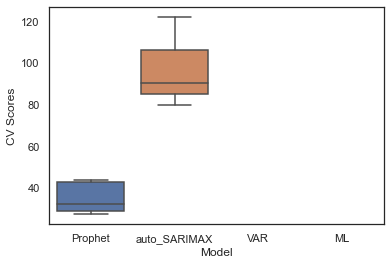

In [13]:
automl_model.plot_cv_scores()

In [14]:
# There is a Bug with Prophet folds: https://github.com/AutoViML/Auto_TS/issues/25
automl_model.get_cv_scores()

,Model,CV Scores
0,Prophet,28.657810
1,Prophet,32.230402
2,Prophet,27.244264
3,Prophet,43.539902
4,Prophet,43.014645
5,auto_SARIMAX,122.233221
6,auto_SARIMAX,90.517650
7,auto_SARIMAX,79.643104
8,VAR,inf
9,ML,inf


In [15]:
results_dict = automl_model.get_ml_dict()

In [16]:
results_dict['Prophet']['forecast']  

72     237.821917
73     241.792029
74     267.141174
75     257.744408
76     261.961869
77     274.906775
78     303.346571
79     297.759518
80     281.385239
81     254.199941
82     233.433827
83     255.279723
78     306.301401
79     301.664633
80     286.478758
81     260.558560
82     240.904778
83     263.395125
84     267.375239
85     269.154711
86     298.525596
87     292.454324
88     287.552679
89     310.816087
90     352.007568
91     364.173715
92     336.706508
93     318.656076
94     298.573727
95     315.508098
96     324.876944
97     326.059338
98     356.069588
99     351.722073
100    352.618571
101    384.190744
108    371.423335
109    370.478094
110    402.661764
111    397.753853
112    400.085247
113    432.405998
114    462.526939
115    460.909142
116    430.611837
117    400.254431
118    374.495304
119    401.590630
132    424.655602
133    421.126379
134    456.827629
135    451.116355
136    453.734897
137    493.276633
138    524.021222
139    527

In [17]:
results_dict['auto_SARIMAX']['forecast'] 

[array([487.93273336, 494.13445304, 502.46719867, 488.09960719,
        485.41407957, 476.55373539, 478.10278962, 476.1000746 ,
        479.14462064, 478.66123549, 480.34700439, 479.5765048 ]),
 array([487.93273336, 494.13445304, 502.46719867, 488.09960719,
        485.41407957, 476.55373539, 478.10278962, 476.1000746 ,
        479.14462064, 478.66123549, 480.34700439, 479.5765048 ]),
 array([487.93273336, 494.13445304, 502.46719867, 488.09960719,
        485.41407957, 476.55373539, 478.10278962, 476.1000746 ,
        479.14462064, 478.66123549, 480.34700439, 479.5765048 ])]

# Forecast Results

In [19]:
# Using Best Model
future_predictions = automl_model.predict(
    testdata=FORECAST_PERIOD
)  
future_predictions

Building Forecast dataframe. Forecast Period = 12


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
144,1960-12-31,480.595162,390.759638,563.866944,480.586474,480.604104,0.0,0.0,0.0,0.0,0.0,0.0,480.595162
145,1961-01-31,483.515160,396.396839,576.233269,483.467975,483.553081,0.0,0.0,0.0,0.0,0.0,0.0,483.515160
146,1961-02-28,486.152578,393.080101,576.694497,486.070712,486.219750,0.0,0.0,0.0,0.0,0.0,0.0,486.152578
147,1961-03-31,489.072576,399.891590,577.717685,488.948332,489.183991,0.0,0.0,0.0,0.0,0.0,0.0,489.072576
148,1961-04-30,491.898380,407.752027,578.020982,491.728079,492.059887,0.0,0.0,0.0,0.0,0.0,0.0,491.898380
149,1961-05-31,494.818378,405.433108,586.972082,494.583947,495.037750,0.0,0.0,0.0,0.0,0.0,0.0,494.818378
150,1961-06-30,497.644183,410.523671,590.289407,497.357862,497.927912,0.0,0.0,0.0,0.0,0.0,0.0,497.644183
151,1961-07-31,500.564181,412.738981,588.112636,500.229615,500.900160,0.0,0.0,0.0,0.0,0.0,0.0,500.564181
152,1961-08-31,503.484179,414.559864,586.037937,503.070832,503.902284,0.0,0.0,0.0,0.0,0.0,0.0,503.484179
153,1961-09-30,506.309983,419.679786,590.234166,505.816009,506.778903,0.0,0.0,0.0,0.0,0.0,0.0,506.309983


In [20]:
# Using specific model
future_predictions = automl_model.predict(
    testdata=FORECAST_PERIOD,
    model='auto_SARIMAX'
)
future_predictions

Building Forecast dataframe. Forecast Period = 12


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
144,1960-12-31,480.595162,386.020658,567.769499,480.587823,480.613637,0.0,0.0,0.0,0.0,0.0,0.0,480.595162
145,1961-01-31,483.515160,392.198828,568.427152,483.480342,483.571891,0.0,0.0,0.0,0.0,0.0,0.0,483.515160
146,1961-02-28,486.152578,396.015282,566.253871,486.080303,486.248446,0.0,0.0,0.0,0.0,0.0,0.0,486.152578
147,1961-03-31,489.072576,406.301613,578.781643,488.956472,489.220793,0.0,0.0,0.0,0.0,0.0,0.0,489.072576
148,1961-04-30,491.898380,405.165657,581.435822,491.728721,492.104187,0.0,0.0,0.0,0.0,0.0,0.0,491.898380
149,1961-05-31,494.818378,401.319769,584.098175,494.592743,495.066590,0.0,0.0,0.0,0.0,0.0,0.0,494.818378
150,1961-06-30,497.644183,412.042488,592.779106,497.356726,497.945880,0.0,0.0,0.0,0.0,0.0,0.0,497.644183
151,1961-07-31,500.564181,417.149078,586.297566,500.205371,500.942932,0.0,0.0,0.0,0.0,0.0,0.0,500.564181
152,1961-08-31,503.484179,412.549230,594.076230,503.045459,503.925110,0.0,0.0,0.0,0.0,0.0,0.0,503.484179
153,1961-09-30,506.309983,418.516087,592.994102,505.799046,506.845753,0.0,0.0,0.0,0.0,0.0,0.0,506.309983


In [21]:
# Using specific model
future_predictions = automl_model.predict(
    testdata=FORECAST_PERIOD,
    model='Prophet',
    simple=False

)
future_predictions

Building Forecast dataframe. Forecast Period = 12


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
144,1960-12-31,480.595162,394.090885,576.328688,480.584487,480.604264,0.0,0.0,0.0,0.0,0.0,0.0,480.595162
145,1961-01-31,483.515160,395.782362,568.035421,483.469725,483.545225,0.0,0.0,0.0,0.0,0.0,0.0,483.515160
146,1961-02-28,486.152578,404.278857,573.773423,486.060818,486.209596,0.0,0.0,0.0,0.0,0.0,0.0,486.152578
147,1961-03-31,489.072576,401.793657,574.930981,488.938897,489.171569,0.0,0.0,0.0,0.0,0.0,0.0,489.072576
148,1961-04-30,491.898380,403.569327,578.862162,491.707017,492.046251,0.0,0.0,0.0,0.0,0.0,0.0,491.898380
149,1961-05-31,494.818378,403.526306,576.502955,494.575789,495.031820,0.0,0.0,0.0,0.0,0.0,0.0,494.818378
150,1961-06-30,497.644183,409.303915,579.130361,497.349158,497.910434,0.0,0.0,0.0,0.0,0.0,0.0,497.644183
151,1961-07-31,500.564181,416.602948,593.506649,500.204788,500.886082,0.0,0.0,0.0,0.0,0.0,0.0,500.564181
152,1961-08-31,503.484179,414.733518,591.834111,503.059996,503.879674,0.0,0.0,0.0,0.0,0.0,0.0,503.484179
153,1961-09-30,506.309983,424.543057,597.128852,505.792438,506.775127,0.0,0.0,0.0,0.0,0.0,0.0,506.309983
